# Import basic package

In [1]:
import pandas as pd
from PIL import ImageDraw, Image
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
from sklearn.svm import SVR
%matplotlib inline
#pd.options.mode.chained_assignment = None
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 100)

/Users/ray/.pyenv/versions/3.6.1/envs/python_dss/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load CSV

In [2]:
FTRAIN = '../data/training.csv'
FTEST = '../data/test.csv'

In [3]:
df = pd.read_csv(FTRAIN)
df.tail(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
7048,66.938311,43.42451,31.096059,39.528604,NaN,NaN,NaN,NaN,NaN,NaN,...,73.033339,NaN,NaN,NaN,NaN,NaN,NaN,45.90048,82.773096,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


# Visualize the NA data in DataFrame

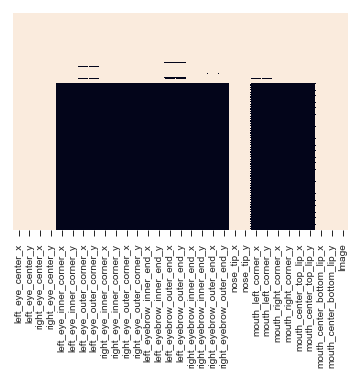

In [4]:
sns.heatmap(df.isnull() == False, cbar=False, yticklabels=False)

# Fitting with SVR on each columns

In [5]:
t = time.time()

specialists = {}
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

for i in range(30):
    dt = time.time()
    print(i+1, df.columns[i])
    idx = df[df[df.columns[i]].isnull() == False].index
    tmp_df = df.iloc[idx]
    #tmp_df = df.dropna()
    X = np.vstack(tmp_df['Image'].values)
    y = tmp_df[tmp_df.columns[:-1]]
    specialists[tmp_df.columns[i]] = SVR(kernel='rbf').fit(X, y[tmp_df.columns[i]])
    print("\tdt : {}".format(time.time()-dt))
    
print("Done")
print("dt : {}".format(time.time()-t))

1 left_eye_center_x
	dt : 620.1215510368347
2 left_eye_center_y
	dt : 611.0739452838898
3 right_eye_center_x
	dt : 607.8265080451965
4 right_eye_center_y
	dt : 608.1462440490723
5 left_eye_inner_corner_x
	dt : 63.09696888923645
6 left_eye_inner_corner_y
	dt : 64.02473497390747
7 left_eye_outer_corner_x
	dt : 64.4093120098114
8 left_eye_outer_corner_y
	dt : 63.46052598953247
9 right_eye_inner_corner_x
	dt : 62.61830496788025
10 right_eye_inner_corner_y
	dt : 62.743797063827515
11 right_eye_outer_corner_x
	dt : 64.34084486961365
12 right_eye_outer_corner_y
	dt : 63.54883909225464
13 left_eyebrow_inner_end_x
	dt : 65.13917064666748
14 left_eyebrow_inner_end_y
	dt : 63.825531005859375
15 left_eyebrow_outer_end_x
	dt : 61.6855411529541
16 left_eyebrow_outer_end_y
	dt : 61.76233911514282
17 right_eyebrow_inner_end_x
	dt : 64.03544807434082
18 right_eyebrow_inner_end_y
	dt : 63.87786793708801
19 right_eyebrow_outer_end_x
	dt : 62.88751697540283
20 right_eyebrow_outer_end_y
	dt : 62.2767789363

# Load CSV (TEST)

In [6]:
dft = pd.read_csv(FTEST)

In [7]:
dft['Image'] = dft['Image'].apply(lambda im: np.fromstring(im, sep=' '))
Xt = np.vstack(dft['Image'].values)
len(Xt)

1783

# Predict

In [8]:
t = time.time()

y_pred = []
for i in range(30):
    dt = time.time()
    y_pred.append(specialists[df.columns[i]].predict(Xt))
    print(i+1, "dt : {}".format(time.time()-dt))

print("tt : {}".format(time.time()-t))

1 dt : 156.83538699150085
2 dt : 156.12978887557983
3 dt : 157.70341992378235
4 dt : 156.26539301872253
5 dt : 49.99996900558472
6 dt : 50.202834129333496
7 dt : 51.07777500152588
8 dt : 51.132314920425415
9 dt : 50.98031210899353
10 dt : 49.77997398376465
11 dt : 50.96492791175842
12 dt : 50.339314222335815
13 dt : 51.01205015182495
14 dt : 51.176159143447876
15 dt : 49.64895486831665
16 dt : 49.933253049850464
17 dt : 50.715006828308105
18 dt : 51.02186870574951
19 dt : 50.60079526901245
20 dt : 50.049694776535034
21 dt : 156.92112493515015
22 dt : 160.46903705596924
23 dt : 51.07049894332886
24 dt : 51.30602717399597
25 dt : 51.22682595252991
26 dt : 51.18126201629639
27 dt : 50.89738392829895
28 dt : 51.72748374938965
29 dt : 157.64223289489746
30 dt : 158.6226601600647
tt : 2376.6562790870667


# Save csv

In [9]:
idlookup_df = pd.read_csv('../data/IdLookupTable.csv')
ss_df = pd.read_csv('../data/SampleSubmission.csv')

lst = list(np.ravel(y_pred, order='F'))
lst_col = [df.columns[i%30] for i in range(1783*30)]

cnt=0
for i in range(len(lst)):
    if lst[i]>96:
        cnt+=1
        lst[i] = 96
    elif lst[i]<0:
        cnt+=1
        lst[i] = 0
print("over 0~96 : {}".format(cnt))

i=0
while i < 27124:
    if idlookup_df['FeatureName'].iloc[i] != lst_col[i]:
        lst_col.pop(i);lst.pop(i)
        i-=1
    i+=1
    
ss_df['Location'] = lst

tmp = ss_df.set_index(ss_df['RowId'])
del tmp['RowId']

tmp.to_csv('../data/SampleSubmission_SVM.csv')

over 0~96 : 0


# Convert rows and columns from y_pred list

In [10]:
y_pred_df = pd.DataFrame()
for i in range(30):
    y_pred_df[df.columns[i]] = y_pred[i]
    
y_pred_df.tail(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1782,66.502712,37.541391,30.263089,37.851597,59.304717,37.925076,73.268386,37.673067,36.652272,37.932212,...,48.405719,63.357645,63.17699,75.76416,32.981349,76.005723,47.903352,72.628226,48.579206,78.735105


# Plot result with image

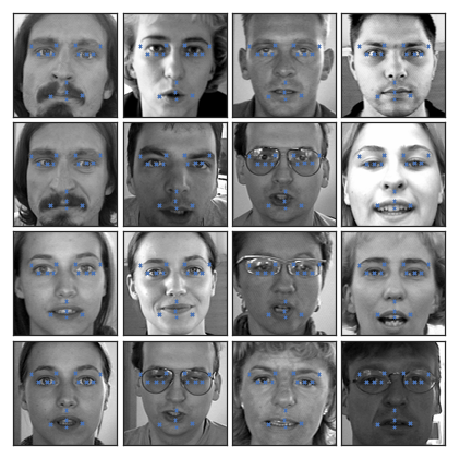

In [11]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2], y[1::2], marker='x', s=10)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred_df.iloc[i], ax)

plt.show()

# KFold

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


t = time.time()
cv = KFold(5, shuffle=True)
ts = 0

for i in range(30):
    dt = time.time()
    print(i+1, df.columns[i])
    idx = df[df[df.columns[i]].isnull() == False].index
    tmp_df = df.iloc[idx]
    #tmp_df = df.dropna()
    X = np.vstack(tmp_df['Image'].values)
    y = tmp_df[tmp_df.columns[:-1]]
    ts += cross_val_score(specialists[df.columns[i]], X, y[df.columns[i]], scoring="neg_mean_squared_error", cv=cv).mean()
    print("\tdt : {}".format(time.time()-dt))
    
print("Done")
    
print("RMSE : {}".format(np.sqrt(ts/30 * (-1))))
print("tt : {}".format(time.time()-t))

1 left_eye_center_x
	dt : 2317.792163133621
2 left_eye_center_y
	dt : 2409.7550032138824
3 right_eye_center_x
	dt : 2634.271327972412
4 right_eye_center_y
	dt : 124228.3681101799
5 left_eye_inner_corner_x
	dt : 244.25026726722717
6 left_eye_inner_corner_y
	dt : 238.39689898490906
7 left_eye_outer_corner_x
	dt : 239.36863017082214
8 left_eye_outer_corner_y
	dt : 238.0441436767578
9 right_eye_inner_corner_x
	dt : 234.56834888458252
10 right_eye_inner_corner_y
	dt : 234.2463240623474
11 right_eye_outer_corner_x
	dt : 240.73708271980286
12 right_eye_outer_corner_y
	dt : 239.5418300628662
13 left_eyebrow_inner_end_x
	dt : 238.8851957321167
14 left_eyebrow_inner_end_y
	dt : 262.7256290912628
15 left_eyebrow_outer_end_x
	dt : 238.69658493995667
16 left_eyebrow_outer_end_y
	dt : 230.03106379508972
17 right_eyebrow_inner_end_x
	dt : 238.85997486114502
18 right_eyebrow_inner_end_y
	dt : 239.71183586120605
19 right_eyebrow_outer_end_x
	dt : 235.24956488609314
20 right_eyebrow_outer_end_y
	dt : 23

# Regularize Test

In [21]:
df = pd.read_csv(FTRAIN)

>## Loading & Fitting

In [22]:
t = time.time()

specialists_reg = {}
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

for i in range(30):
    dt = time.time()
    print(i+1, df.columns[i])
    idx = df[df[df.columns[i]].isnull() == False].index
    tmp_df = df.iloc[idx]
    #tmp_df = df.dropna()
    X = np.vstack(tmp_df['Image'].values) / 255.
    y = (tmp_df[tmp_df.columns[:-1]] - 48 ) / 48
    y = y.astype(np.float32)
    specialists_reg[tmp_df.columns[i]] = SVR(kernel='rbf').fit(X, y[tmp_df.columns[i]])
    print("\tdt : {}".format(time.time()-dt))
    
print("Done")
print("dt : {}".format(time.time()-t))

1 left_eye_center_x
	dt : 49.98927092552185
2 left_eye_center_y
	dt : 22.531349897384644
3 right_eye_center_x
	dt : 32.75061106681824
4 right_eye_center_y
	dt : 21.787425994873047
5 left_eye_inner_corner_x
	dt : 2.5759339332580566
6 left_eye_inner_corner_y
	dt : 1.6708300113677979
7 left_eye_outer_corner_x
	dt : 3.67856502532959
8 left_eye_outer_corner_y
	dt : 2.505924940109253
9 right_eye_inner_corner_x
	dt : 1.7924509048461914
10 right_eye_inner_corner_y
	dt : 1.6682250499725342
11 right_eye_outer_corner_x
	dt : 3.131600856781006
12 right_eye_outer_corner_y
	dt : 3.139845132827759
13 left_eyebrow_inner_end_x
	dt : 3.589191198348999
14 left_eyebrow_inner_end_y
	dt : 3.664983034133911
15 left_eyebrow_outer_end_x
	dt : 5.194082021713257
16 left_eyebrow_outer_end_y
	dt : 5.360477924346924
17 right_eyebrow_inner_end_x
	dt : 3.025300979614258
18 right_eyebrow_inner_end_y
	dt : 3.8262481689453125
19 right_eyebrow_outer_end_x
	dt : 4.3485987186431885
20 right_eyebrow_outer_end_y
	dt : 6.3489

>## Predict

In [23]:
t = time.time()

y_pred_reg = []
for i in range(30):
    dt = time.time()
    y_pred_reg.append(specialists_reg[df.columns[i]].predict(Xt))
    print(i+1, "dt : {}".format(time.time()-dt))

print("tt : {}".format(time.time()-t))

1 dt : 11.173257112503052
2 dt : 5.241891860961914
3 dt : 7.49419903755188
4 dt : 5.010474920272827
5 dt : 1.7366600036621094
6 dt : 1.0458037853240967
7 dt : 2.610651731491089
8 dt : 1.7411160469055176
9 dt : 1.179377794265747
10 dt : 1.023442029953003
11 dt : 2.195277690887451
12 dt : 2.203853130340576
13 dt : 2.506108045578003
14 dt : 2.581188917160034
15 dt : 3.7411108016967773
16 dt : 4.070865869522095
17 dt : 2.157503843307495
18 dt : 2.7378480434417725
19 dt : 3.2211551666259766
20 dt : 4.651932239532471
21 dt : 12.544353723526001
22 dt : 36.69635200500488
23 dt : 4.607067823410034
24 dt : 5.243880987167358
25 dt : 3.738352060317993
26 dt : 6.017998933792114
27 dt : 2.652573347091675
28 dt : 7.307942867279053
29 dt : 13.113734245300293
30 dt : 30.908337831497192
tt : 191.16458201408386


>## Save csv

In [24]:
idlookup_df = pd.read_csv('../data/IdLookupTable.csv')
ss_df = pd.read_csv('../data/SampleSubmission.csv')

lst = list(np.ravel(y_pred_reg, order='F') * 48 + 48)
lst_col = [df.columns[i%30] for i in range(1783*30)]

cnt=0
for i in range(len(lst)):
    if lst[i]>96:
        cnt+=1
        lst[i] = 96
    elif lst[i]<0:
        cnt+=1
        lst[i] = 0
print("over 0~96 : {}".format(cnt))

i=0
while i < 27124:
    if idlookup_df['FeatureName'].iloc[i] != lst_col[i]:
        lst_col.pop(i);lst.pop(i)
        i-=1
    i+=1
    
ss_df['Location'] = lst

tmp = ss_df.set_index(ss_df['RowId'])
del tmp['RowId']

tmp.to_csv('../data/SampleSubmission_SVM_reg.csv')

over 0~96 : 0


>## Change rows and cols

In [25]:
y_pred_reg_df = pd.DataFrame()
for i in range(30):
    y_pred_reg_df[df.columns[i]] = y_pred_reg[i]
    
y_pred_reg_df.tail(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1782,-0.210065,-0.046406,-0.476975,-0.02695,-0.043787,-0.097785,0.409984,-0.11368,-0.164949,-0.165857,...,-0.257409,0.14125,0.179829,0.712472,-0.378693,0.586246,-0.153189,0.721273,-0.30677,0.420518


>## Plot result with image

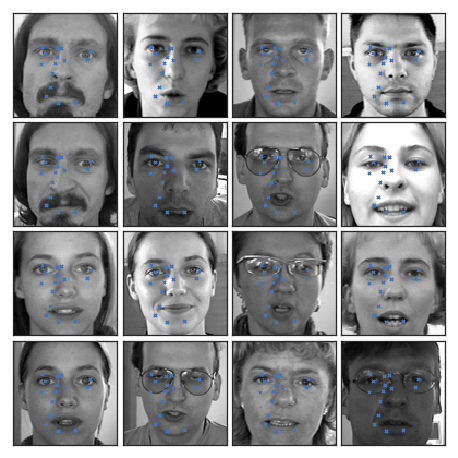

In [26]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred_reg_df.iloc[i], ax)

plt.show()

>## KFOLD

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

t = time.time()
cv = KFold(5, shuffle=True)
ts = 0

for i in range(30):
    dt = time.time()
    print(i+1, df.columns[i])
    idx = df[df[df.columns[i]].isnull() == False].index
    tmp_df = df.iloc[idx]
    #tmp_df = df.dropna()
    X = np.vstack(tmp_df['Image'].values)
    y = tmp_df[tmp_df.columns[:-1]]
    ts += cross_val_score(specialists_reg[df.columns[i]], X, y[df.columns[i]], scoring="neg_mean_squared_error", cv=cv).mean()
    print("\tdt : {}".format(time.time()-dt))
    
print("Done")
    
print("RMSE : {}".format(np.sqrt(ts/30 * (-1))*48))
print("tt : {}".format(time.time()-t))

1 left_eye_center_x
	dt : 2286.644703388214
2 left_eye_center_y
	dt : 4263.198421001434
3 right_eye_center_x
	dt : 2451.405508041382
4 right_eye_center_y
	dt : 2597.5262010097504
5 left_eye_inner_corner_x
	dt : 291.02360701560974
6 left_eye_inner_corner_y
	dt : 292.5887577533722
7 left_eye_outer_corner_x
	dt : 300.6873939037323
8 left_eye_outer_corner_y
	dt : 293.92945408821106
9 right_eye_inner_corner_x
	dt : 277.10369300842285
10 right_eye_inner_corner_y
	dt : 290.4826648235321
11 right_eye_outer_corner_x
	dt : 274.87213683128357
12 right_eye_outer_corner_y
	dt : 269.94049310684204
13 left_eyebrow_inner_end_x
	dt : 281.66016578674316
14 left_eyebrow_inner_end_y
	dt : 274.29636788368225
15 left_eyebrow_outer_end_x
	dt : 275.651282787323
16 left_eyebrow_outer_end_y
	dt : 282.33973479270935
17 right_eyebrow_inner_end_x
	dt : 315.534108877182
18 right_eyebrow_inner_end_y
	dt : 334.1090958118439
19 right_eyebrow_outer_end_x
	dt : 271.20001006126404
20 right_eyebrow_outer_end_y
	dt : 252.1